# Projekt IAU  
## 1. časť - Prieskumná analýza 
### Vypracovali: Marek Adamovič, Michal Pidanič
### Číslo datasetu: 32
### Podiel práce: 50/50

In [57]:
import pandas
import seaborn

### Načítanie a výpis ukážky datasetu:

In [58]:
filename = "032/labor.csv"
df = pandas.read_csv(filename, sep='\t')
df.head()

,Unnamed: 0,indicator,erytrocyty,smoker,weight,trombocyty,alp,hbver,etytr,relationship,ssn,leukocyty,ast,hematokrit,er-cv,hemoglobin,name,alt
0,0,1.0,6.91767,yes,69.94161,6.50529,81.48900,7.30162,6.77497,separated,041-29-7959,6.17532,60.01609,7.12529,44.43192,6.01513,Blake Fox,0.88575
1,1,0.0,9.70624,no,117.24842,6.83699,43.40520,7.90707,7.82625,married,183-58-0483,9.41015,56.79596,5.22638,48.17707,8.13065,Randy Solis,6.09530
2,2,1.0,7.88145,yes,83.97086,7.75608,38.21236,6.81795,5.04172,widowed,411-84-5693,7.27551,63.29051,5.47408,29.81102,4.51670,Phillip Miranda,1.53154
3,3,1.0,6.63073,yes,125.82753,6.06728,88.20804,7.63231,5.57008,divoced,028-84-2760,5.75381,26.62704,6.74435,52.06123,5.92597,Mark Watson,0.58661
4,4,1.0,9.09638,no,50.70530,7.90158,90.12868,8.75450,6.83533,married,375-37-7701,6.77832,32.74759,7.86582,51.68909,6.26871,Patrick Oliver,3.33738


## 1. Základný opis dát spolu s ich charakteristikami

### Počet záznamov a atribútov:

In [59]:
row_count, column_count = df.shape
print("\nNumber of records:", row_count)
print("\nNumber of attributes:", column_count)


Number of records: 9922

Number of attributes: 18


### Typy atribútov:

In [60]:
print(df.dtypes)

Unnamed: 0        int64
indicator       float64
erytrocyty      float64
smoker           object
weight          float64
trombocyty      float64
alp             float64
hbver           float64
etytr           float64
relationship     object
ssn              object
leukocyty       float64
ast             float64
hematokrit      float64
er-cv           float64
hemoglobin      float64
name             object
alt             float64
dtype: object


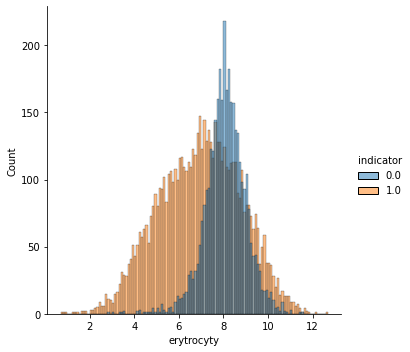

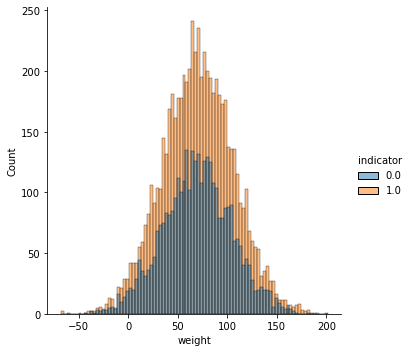

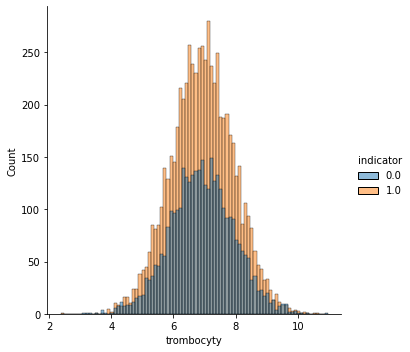

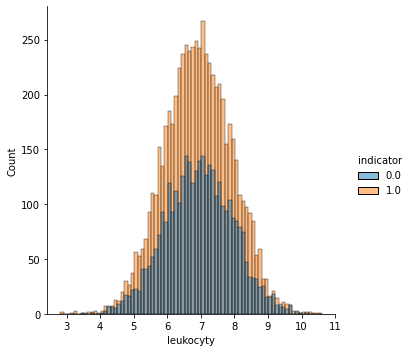

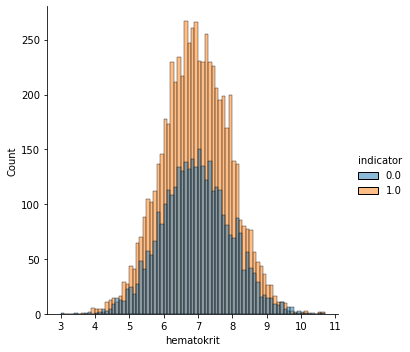

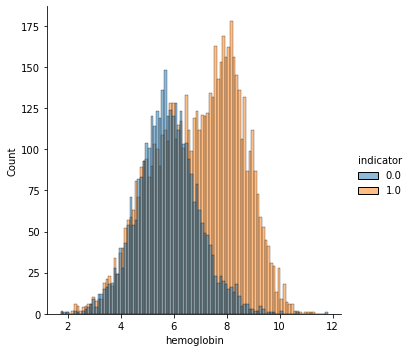

In [61]:
# distribúcia
seaborn.displot(x = "erytrocyty", hue = "indicator", binwidth=0.1, data = df)
seaborn.displot(x = "weight", hue = "indicator", binwidth=3, data = df)
seaborn.displot(x = "trombocyty", hue = "indicator", binwidth=0.1, data = df)
seaborn.displot(x = "leukocyty", hue = "indicator", binwidth=0.1, data = df)
seaborn.displot(x = "hematokrit", hue = "indicator", binwidth=0.1, data = df)
seaborn.displot(x = "hemoglobin", hue = "indicator", binwidth=0.1, data = df)


### Základné deskriptívne štatistiky:

In [64]:
# základné deskriptívne štatistiky
print(df.describe())


# count = počet záznamov .. ľahko vidíme, koľko dát z daného stĺpca chýba
# mean = aritmetický priemer
# std = smerodajná odchýlka, hovorí o veľkosti rozptylu dát oproti aritmetickému priemeru

        patient_id    indicator   erytrocyty       smoker       weight  \
count  9922.000000  9922.000000  9892.000000  9922.000000  9922.000000   
mean   4960.500000     0.643923     7.354813     0.397803    70.033130   
std    2864.379019     0.478863     1.655995     0.489469    35.360537   
min       0.000000     0.000000     0.695010     0.000000   -68.224370   
25%    2480.250000     0.000000     6.341305     0.000000    46.241730   
50%    4960.500000     1.000000     7.627100     0.000000    70.063115   
75%    7440.750000     1.000000     8.480747     1.000000    93.885320   
max    9921.000000     1.000000    12.598130     1.000000   199.399280   

        trombocyty          alp        hbver        etytr    leukocyty  \
count  9893.000000  9893.000000  9893.000000  9893.000000  9893.000000   
mean      6.929616    58.523833     6.924524     6.146493     6.929109   
std       1.010643    25.531979     1.443274     1.615464     1.006582   
min       2.373590     0.000000     1

In [65]:
# TODO: Identifikácia problémov v dátach s navrhnutým riešením

# premenovať prvý stĺpec Unnamed: 0 na id pacienta
df = df.rename(columns={"Unnamed: 0": "patient_id"})

# Stĺpec smoker má hodnoty yes/no/Y/N .. upravíme to na 1/0
# pandas.unique(df.smoker)
df.smoker = df.smoker.replace({"Y": 1, "N": 0, "yes": 1, "no": 0})

# skontrolujeme, v ktorých stĺpcoch chýbajú dáta
df.isnull().any()


patient_id      False
indicator       False
erytrocyty       True
smoker          False
weight          False
trombocyty       True
alp              True
hbver            True
etytr            True
relationship    False
ssn             False
leukocyty        True
ast              True
hematokrit       True
er-cv            True
hemoglobin       True
name            False
alt              True
dtype: bool